In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../Kaggle_Housing_Prices/train.csv")
pd.options.display.max_columns=None

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# data.hist(bins=50, figsize=(20,15))
# plt.show()

In [4]:
# data.describe()

In [3]:
clean_df=data.copy()

In [4]:
## drop Id.  DF has index
clean_df.drop("Id", axis=1, inplace=True)
#clean_df.head(2)

In [13]:
clean_df[['MSSubClass', 'SalePrice']].groupby('MSSubClass').median().sort_values(by='SalePrice', ascending=True)

,SalePrice
MSSubClass,
180,88500
30,99900
45,107500
190,128250
50,132000
90,135980
85,140750
40,142500
160,146000


In [15]:
#  MSSubClass could be made linear integers based on median SalePrice in that class.  

SubClassNumber=[]

for each in clean_df["MSSubClass"]:
    if each == 20:
        cat=11
    elif each == 30:
        cat=2
    elif each == 40:
        cat=8
    elif each == 45:
        cat=3
    elif each == 50:
        cat=5
    elif each == 60:
        cat=15
    elif each == 70:
        cat=10
    elif each == 75:
        cat=12
    elif each == 80:
        cat=13
    elif each == 85:
        cat=7
    elif each == 90:
        cat=6
    elif each == 120:
        cat=14
    elif each == 150:
        cat=0
    elif each == 160:
        cat=9
    elif each == 180:
        cat=1
    elif each == 190:
        cat=4
        
    SubClassNumber.append(cat)

clean_df["SubClassInt"]=SubClassNumber
#clean_df.drop("MSSubClass", axis=1, inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty,15
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty,11
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty,15
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy,10
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty,15


In [5]:
##  MSSubClass could be categorical.  

SubClass=[]

for each in clean_df["MSSubClass"]:
    if each == 20:
        cat='twenty'
    elif each == 30:
        cat='thirty'
    elif each == 40:
        cat='forty'
    elif each == 45:
        cat='fortyfive'
    elif each == 50:
        cat='fifty'
    elif each == 60:
        cat='sixty'
    elif each == 70:
        cat='seventy'
    elif each == 75:
        cat='seventyfive'
    elif each == 80:
        cat='eighty'
    elif each == 85:
        cat='eightyfive'
    elif each == 90:
        cat='ninety'
    elif each == 120:
        cat='onetwenty'
    elif each == 150:
        cat='onefifty'
    elif each == 160:
        cat='onesixty'
    elif each == 180:
        cat='oneeighty'
    elif each == 190:
        cat='oneninety'
        
    SubClass.append(cat)

clean_df["SubClass"]=SubClass
#clean_df.drop("MSSubClass", axis=1, inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty


## Fill null values

In [16]:
## Many houses do not have basements.  fill basement NaN's with 'none'
clean_df['BsmtQual'].fillna('none', inplace=True)
clean_df['BsmtCond'].fillna('none', inplace=True)
clean_df['BsmtExposure'].fillna('none', inplace=True)
clean_df['BsmtFinType1'].fillna('none', inplace=True)
clean_df['BsmtFinType2'].fillna('none', inplace=True)
clean_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,sixty,15
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,twenty,11
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,sixty,15
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,seventy,10
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,sixty,15


In [17]:
## fill Alley NaN's with 'none'
clean_df['Alley'].fillna('none', inplace=True)

## fil Lot Frontage with Median
median=clean_df['LotFrontage'].median()
clean_df['LotFrontage'].fillna(median, inplace=True)

In [18]:
## drop 1 row with NaN for Electrical
clean_df.dropna(axis=0, subset=['Electrical'], inplace=True)

In [19]:
## fil fireplaceQual NaN's with 'none'
clean_df['FireplaceQu'].fillna('none', inplace=True)

In [20]:
## take care of garage NaN's

clean_df['GarageType'].fillna('none', inplace=True)
clean_df['GarageYrBlt'].fillna(0, inplace=True)
clean_df['GarageFinish'].fillna('none', inplace=True)
clean_df['GarageQual'].fillna('none', inplace=True)
clean_df['GarageCond'].fillna('none', inplace=True)

In [21]:
# ## Should garage year built be dropped. No garage with year 0 creates extreme scale differences.  Condition
# ## and quality should be more important than year.

# clean_df.drop('GarageYrBlt', axis=1, inplace=True)

In [22]:
## Pool NaN's
clean_df['PoolQC'].fillna('none', inplace=True)
## Fence
clean_df['Fence'].fillna('none', inplace=True)
## MiscFeature
clean_df['MiscFeature'].fillna('none', inplace=True)

In [23]:
# vnr=clean_df.loc[clean_df['MasVnrType'].isnull()]
# vnr

clean_df['MasVnrType'].fillna('none', inplace=True)
clean_df['MasVnrArea'].fillna(0, inplace=True)

In [24]:
### No more NaN's in dataset
clean_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
SubClass         0
SubClassInt      0
Length: 82, dtype: int64

## Quality can be numerical

In [25]:
## Exterior Quality can be numerical
exqual=[]

for each in clean_df['ExterQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    exqual.append(q)
    
clean_df['ExtQuality']=exqual
clean_df.drop('ExterQual', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3


In [26]:
## Exterior condition can be numerical
excond=[]

for each in clean_df['ExterCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    excond.append(q)
    
clean_df['ExtCondition']=excond
clean_df.drop('ExterCond', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3,3


In [27]:
## Basement Quality can be numerical
bqual=[]

for each in clean_df['BsmtQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    bqual.append(q)
    


In [28]:
clean_df['BsmtQuality']=bqual
## save column for now. see if correlation is better with numeric or binary
#clean_df.head(2)

In [29]:
## basement condition can be numerical

bcond=[]

for each in clean_df['BsmtCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    bcond.append(q)

clean_df["BasementCond"]=bcond

In [30]:
## HeatingQC can be numerical
hq=[]

for each in clean_df['HeatingQC']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    hq.append(q)

clean_df['HeatQuality']=hq

## leave string version in dataframe.  will check correlations later and remove low values
##clean_df.drop('HeatingQC', axis=1, inplace=True)

In [31]:
## Central Air
ac=[]

for each in clean_df['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
clean_df['CentralAC']=ac
clean_df.drop('CentralAir', axis=1, inplace=True)

In [32]:
## Kitchen Quaity
kq=[]

for each in clean_df['KitchenQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    kq.append(q)
    
clean_df['KitchQuality']=kq
##clean_df.drop('KitchenQual', axis=1, inplace=True)

In [33]:
## Functional
fnc=[]

for each in clean_df['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
clean_df['Functionality']=fnc
##clean_df.drop('Functional', axis=1, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8
1,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,181500,twenty,11,3,3,4,3,5,1,3,8


In [34]:
## Fireplace Quality
fpq=[]

for each in clean_df['FireplaceQu']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    fpq.append(q)
    
clean_df['FireplaceQuality']=fpq
##clean_df.drop('FireplaceQu', axis=1, inplace=True)

In [35]:
## Garage Quality

gq=[]

for each in clean_df['GarageQual']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    gq.append(q)
    
clean_df['GarageQuality']=gq

In [36]:
gc=[]

for each in clean_df['GarageCond']:
    if each=='Ex':
        q=5
    elif each =='Gd':
        q=4
    elif each =='TA':
        q=3
    elif each =='Fa':
        q=2
    elif each =='Po':
        q=1
    elif each == 'none':
        q=0
    gc.append(q)
    
clean_df['GarageCondition']=gc

In [37]:
### Add a column using Median Neighborhood value

medsaledf=data.groupby('Neighborhood').median()
medsaledf['SalePrice'].sort_values()

Neighborhood
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: SalePrice, dtype: float64

In [38]:
meds=[]

for each in clean_df['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
clean_df['NeighborhoodMedValue']=meds
clean_df.drop('Neighborhood', axis=1, inplace=True)

In [ ]:
# ## Add a column total rooms per total square feet

# clean_df['RmsPerSF']=(clean_df['TotRmsAbvGrd']/(clean_df['1stFlrSF']+clean_df['2ndFlrSF']))

# corrDF=O2_df[['TotRmsAbvGrd', 'RmsPerSF', 'SalePrice']]
# corrDF.corr()

In [ ]:
# ### No better than TotRmsAbvGrd
# clean_df.drop('RmsPerSF', axis=1, inplace=True)

In [47]:
## Add a column using Zoning median Price

zmed=[]

for each in clean_df['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
clean_df['ZoningMedian']=zmed

In [111]:
## Add a column changing Electrical to representative of mean saleprice per category
Elec=[]

for each in clean_df['Electrical']:
    if each == 'Mix':
        E=.67
    elif each =='FuseP':
        E=.97
    elif each == 'FuseF':
        E=1.08
    elif each == 'FuseA':
        E=1.22
    elif each =='SBrkr':
        E=1.87
    Elec.append(E)
    
clean_df["ElectricalCat"]=Elec

In [143]:
## Paved Drive based on Median sale price
paved=[]
for each in clean_df['PavedDrive']:
    if each == 'N':
        p=1.11
    elif each == 'P':
        p=1.32
    elif each == 'Y':
        p=1.69
    paved.append(p)

clean_df['Driveway']=paved


In [148]:
## PoolQC based on average sale Price
pq=[]
for each in clean_df['PoolQC']:
    if each == 'none':
        p=1.8
    elif each == 'Gd':
        p=2
    elif each == 'Fa':
        p=2.2
    elif each == 'Ex':
        p=4.9
    pq.append(p)
    
clean_df['PoolQuality']=pq

In [126]:
## Add a column TotalSquareFeet
clean_df['TotalSF']= clean_df['1stFlrSF']+clean_df['2ndFlrSF']
## total sq ft plus basement
clean_df['TotSFInclBsmt']= clean_df['TotalSF']+clean_df['TotalBsmtSF']
## Total Full Bath
clean_df['TotFullBath']=clean_df['BsmtFullBath']+clean_df['FullBath']
## Total Half Bath
clean_df['TotHalfBath']=clean_df['BsmtHalfBath']+clean_df['HalfBath']
## Total Baths with half baths represented as 0.1
clean_df['TotalBaths']=clean_df['TotFullBath']+(clean_df['TotHalfBath']*0.1)

In [302]:
### Add a column using  Median TotSFInclBsmt per NeighborhoodMedValue

medSF=clean_df.groupby('NeighborhoodMedValue').median()
medSF['TotalSF'].sort_values()

NeighborhoodMedValue
88000     1092.0
135000    1106.0
103000    1111.0
106000    1155.0
140000    1196.0
121750    1200.0
153500    1204.0
124300    1210.5
146000    1322.0
119000    1368.0
137500    1392.5
218000    1437.0
197200    1500.0
191000    1500.0
225500    1564.5
181000    1593.0
179900    1603.0
182900    1664.0
139500    1691.0
228475    1692.0
200624    1717.0
200250    1738.0
278000    1742.0
315000    1850.0
301500    2418.0
Name: TotalSF, dtype: float64

In [303]:
medsf=[]

for each in clean_df['NeighborhoodMedValue']:
    if each == 88000:
        m=1092
    elif each == 103000:
        m=1111
    elif each == 106000:
        m=1155
    elif each == 119000:
        m=1368
    elif each == 121750:
        m=1200
    elif each == 124300:
        m=1210
    elif each == 135000:
        m=1106
    elif each == 137500:
        m=1392
    elif each == 139500:
        m=1691
    elif each == 140000:
        m=1196
    elif each == 146000:
        m=1322
    elif each == 153500:
        m=1204
    elif each == 179900:
        m=1603
    elif each == 181000:
        m=1593
    elif each == 182900:
        m=1664
    elif each == 191000:
        m=1500
    elif each == 197200:
        m=1500
    elif each == 200250:
        m=1738
    elif each == 200624:
        m=1717
    elif each == 218000:
        m=1437
    elif each == 225500:
        m=1564
    elif each == 228475:
        m=1692
    elif each == 278000:
        m=1742
    elif each == 301500:
        m=2418
    elif each == 315000:
        m=1850
        
    medsf.append(m)
    
clean_df['MedianSFByNeighborhood']=medsf


In [149]:
clean_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000,1.87,1710,2566,3,1,3.1,1.69,1.8


In [277]:
#clean_df[['SaleType', 'SalePrice']].groupby('SaleType').mean().sort_values(by='SalePrice', ascending=True)
clean_df['MiscVal'].value_counts()
#clean_df.loc[clean_df['LotFrontage']>150]

0        1407
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [307]:
corr_matrix=clean_df.corr()
corrDF=clean_df
#corrDF=clean_df.loc[clean_df['TotalBsmtSF']<2500]
corrDF[[ 'MedianSFByNeighborhood', 'PoolQuality', 'SalePrice']].corr()

,MedianSFByNeighborhood,PoolQuality,SalePrice
MedianSFByNeighborhood,1.000000,0.046979,0.647297
PoolQuality,0.046979,1.000000,0.145564
SalePrice,0.647297,0.145564,1.000000


In [ ]:
### Check drop 1st and 2nd floor sf.  TotSFInclBsmt has highest corr at .78
###check ElectricalCat vs Electrical correlation
## TotalBaths has highest corr at .6

In [152]:
clean_df.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality
0,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000,1.87,1710,2566,3,1,3.1,1.69,1.8


## Find Outliers

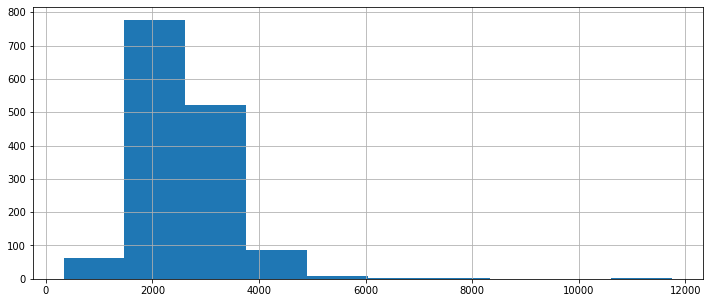

In [359]:
clean_df['TotSFInclBsmt'].hist(figsize=(12,5))

In [366]:
newdf=clean_df.copy()

In [367]:
newdf=newdf.loc[newdf['SalePrice']<470000]

In [368]:
# newdf.drop([523, 1298], inplace=True)
# newdf.drop('Street', axis=1, inplace=True)
# newdf.drop('BsmtFinSF2', axis=1, inplace=True)     ##very skewed distribution
# newdf.drop('3SsnPorch', axis=1, inplace=True)
# newdf.drop('ScreenPorch', axis=1, inplace=True)

In [369]:
## LotArea 

median=newdf.loc[newdf['LotArea']<50000, 'LotArea'].median()
newdf.loc[newdf['LotArea']>50000, 'LotArea']=np.nan
newdf.fillna(median, inplace=True)

newdf.loc[[249]]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood
249,50,RL,69.0,9400.0,none,IR2,Low,AllPub,CulDSac,Sev,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,CBlock,Gd,TA,Gd,Rec,697,Unf,747,1444,GasA,Gd,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,none,none,Shed,500,6,2007,WD,Normal,277000,fifty,5,4,3,4,3,4,1,4,8,3,3,3,200250,174000,1.87,2144,3588,2,1,2.1,1.69,1.8,1738


In [370]:
## MasVnrArea  set max to 800

temp=newdf.loc[newdf['MasVnrArea']>800]
temp[['MasVnrArea', 'SalePrice']]

#median=newdf.loc[newdf['MasVnrArea']<800, 'MasVnrArea'].median()
newdf.loc[newdf['MasVnrArea']>800, 'MasVnrArea']=np.nan
newdf.fillna(800, inplace=True)

newdf.loc[[115]]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood
115,160,FV,34.0,3230.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,TwnhsE,2Story,6,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,800.0,PConc,Gd,TA,No,GLQ,419,Unf,310,729,GasA,Gd,SBrkr,729,729,0,1458,0,0,2,1,2,1,TA,5,Typ,1,Fa,Detchd,1999.0,Unf,2,440,TA,TA,Y,0,32,0,0,none,none,none,0,6,2007,WD,Normal,176000,onesixty,9,3,3,4,3,4,1,3,8,2,3,3,225500,205950,1.87,1458,2187,2,1,2.1,1.69,1.8,1564


In [371]:
## TotalBsmtSF set max to 2500
newdf.loc[newdf['TotalBsmtSF']>2500, 'TotalBsmtSF']=np.nan
newdf.fillna(2500, inplace=True)
newdf['TotalBsmtSF'].max()

2500.0

In [372]:
## LotFrontage set max to 150
newdf.loc[newdf['LotFrontage']>150, 'LotFrontage']=np.nan
newdf.fillna(150, inplace=True)
newdf['LotFrontage'].max()

150.0

In [373]:
## TotalBaths max to 4
newdf.loc[newdf['TotalBaths']>4.2, 'TotalBaths']=np.nan
newdf.fillna(4.2, inplace=True)
newdf['TotalBaths'].max()

4.2

In [374]:
## Set BedroomsAbvGr max to 4
newdf.loc[newdf['BedroomAbvGr']>4, 'BedroomAbvGr']=np.nan
newdf.fillna(4, inplace=True)
newdf['BedroomAbvGr'].max()

4.0

In [375]:
## Set GarageCars max to 3
newdf.loc[newdf['GarageCars']>3, 'GarageCars']=np.nan
newdf.fillna(3, inplace=True)
newdf['GarageCars'].max()

3.0

In [376]:
## Limit GarageArea to 1000
newdf.loc[newdf['GarageArea']>1000, 'GarageArea']=np.nan
newdf.fillna(1000, inplace=True)
newdf['GarageArea'].max()

1000.0

In [377]:
## Limit WoddDeckSF to 500
newdf.loc[newdf['WoodDeckSF']>500, 'WoodDeckSF']=np.nan
newdf.fillna(500, inplace=True)
newdf['WoodDeckSF'].max()

500.0

In [378]:
## Limit OpenPorchSF to 300
newdf.loc[newdf['OpenPorchSF']>300, 'OpenPorchSF']=np.nan
newdf.fillna(300, inplace=True)
newdf['OpenPorchSF'].max()

300.0

In [379]:
## Limit EnclosedPorch to 100
newdf.loc[newdf['EnclosedPorch']>75, 'EnclosedPorch']=np.nan
newdf.fillna(75, inplace=True)
newdf['EnclosedPorch'].max()

75.0

In [380]:
## Set max MiscVal to 1500
newdf.loc[newdf['MiscVal']>100, 'MiscVal']=np.nan
newdf.fillna(100, inplace=True)
newdf['MiscVal'].max()

100.0

In [476]:
newdf.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SubClass,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood
0,60,RL,65.0,8450.0,none,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,PConc,Gd,TA,No,GLQ,706,Unf,150,856.0,GasA,Ex,SBrkr,0,1710,1,0,2,1,3.0,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0,none,none,none,0.0,2,2008,WD,Normal,208500,sixty,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000,1.87,1710,2566,3,1,3.1,1.69,1.8,1500


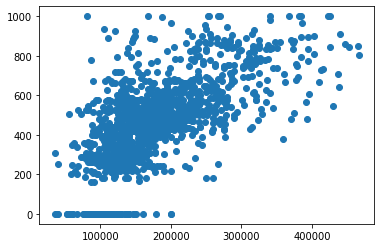

In [481]:
plt.scatter(newdf['SalePrice'], newdf['GarageArea'])

In [479]:
#newdf.drop([661,848], inplace=True)
      ## TotSFInclBsmt is better correlated than any other sq ft
#newdf.drop(['1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)
#newdf.drop('LowQualFinSF', axis=1, inplace=True)

In [484]:
corr_matrix=newdf.corr()
newcorrDF=newdf
#newcorrDF=newdf.loc[clean_df['TotalBsmtSF']<2500]
newcorrDF[['TotSFInclBsmt', 'SalePrice']].corr()

,TotSFInclBsmt,SalePrice
TotSFInclBsmt,1.000000,0.817559
SalePrice,0.817559,1.000000


## OneHotEncode

In [384]:
## Turn string categories into binary

clean_binary=pd.get_dummies(newdf)
clean_binary.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,Alley_none,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,PoolQC_none,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeatu

In [385]:
clean_binary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Columns: 300 entries, MSSubClass to SubClass_twenty
dtypes: float64(16), int64(41), uint8(243)
memory usage: 1.0 MB


## Create Train, Validation, and Test sets

In [386]:
## Split data into train and test sets

from sklearn.model_selection import train_test_split

In [387]:
from sklearn.metrics import mean_squared_error

## Random Forest

In [389]:
from sklearn.ensemble import RandomForestRegressor

forest_model=RandomForestRegressor()

In [390]:
from sklearn.preprocessing import StandardScaler

####  Linear MSE   63,789
#### Scaled Linear MSE    5e16
#### Tree MSE    60,072
#### Scaled Tree MSE   51,987
#### Forest MSE 39, 613
#### MINMAX Scaled Forest MSE  38,774
#### Standard Scaler Forest MSE  38,743

In [434]:
## Compare number of columns vs original

simple_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Columns: 153 entries, LotFrontage to SubClass_thirty
dtypes: float64(14), int64(33), uint8(106)
memory usage: 691.9 KB


In [435]:
## Scale simple_df data
from sklearn.preprocessing import StandardScaler

XO= simple_df.drop('SalePrice', axis=1)
yO= simple_df['SalePrice']

stdscaler=StandardScaler()
XO_stdScaled=stdscaler.fit_transform(XO)

XO_Train, XO_Test, yO_Train, yO_Test=train_test_split(XO_stdScaled, yO, train_size=.75, random_state=42)
XO_train, XO_val, yO_train, yO_val=train_test_split(XO_Train, yO_Train, train_size=0.85, random_state=42)

In [436]:
forest_model.fit(XO_train, yO_train)
forest_model.score(XO_train, yO_train)

0.9846895232691392

In [437]:
forest_model.score(XO_val, yO_val)

0.8832456474386895

In [438]:
O_forest_predictions=forest_model.predict(XO_val)

O_forest_mse= mean_squared_error(yO_val, O_forest_predictions)
O_forest_rmse=np.sqrt(O_forest_mse)
O_forest_rmse

27953.88855770078

## Play with R2 here

In [590]:
corr_matrix2=simple_df.corr()
corr_matrix2['SalePrice'].sort_values(ascending=False)

SalePrice               1.000000
TotSFInclBsmt           0.818173
OverallQual             0.806348
NeighborhoodMedValue    0.749221
TotalSF                 0.719118
                          ...   
MasVnrType_None        -0.387572
GarageFinish_Unf       -0.431965
BsmtQual_TA            -0.476844
FireplaceQu_none       -0.490757
KitchenQual_TA         -0.542046
Name: SalePrice, Length: 153, dtype: float64

In [440]:
corr_list2=corr_matrix2['SalePrice'].sort_values(ascending=False)
corr_df2=pd.DataFrame(corr_list2)
corr_df2.reset_index().head()

,index,SalePrice
0,SalePrice,1.000000
1,TotSFInclBsmt,0.818173
2,OverallQual,0.806348
3,NeighborhoodMedValue,0.749221
4,TotalSF,0.719118


In [441]:
## Turn into a list to loop through
drop_list2=corr_df2.loc[(corr_df2['SalePrice']<0.4) & (corr_df2['SalePrice']> -0.4)]
        
drop_list2.reset_index(inplace=True)
drop_list2['index']

cols2=drop_list2['index'].tolist()
cols2[:5]

## try dropping columns with < .05 R2value

O2_df=simple_df.copy()

for each in cols2:
    O2_df.drop(each, axis=1, inplace=True)
    
O2_df.head(2)

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,SalePrice,SubClassInt,ExtQuality,BsmtQuality,HeatQuality,KitchQuality,FireplaceQuality,NeighborhoodMedValue,TotalSF,TotSFInclBsmt,TotFullBath,TotalBaths,MedianSFByNeighborhood,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtFinType1_GLQ,HeatingQC_Ex,KitchenQual_Ex,KitchenQual_TA,FireplaceQu_none,GarageFinish_Fin,GarageFinish_Unf
0,7,2003,2003,196.0,856.0,856,1710,2,8,0,2.0,548.0,208500,15,4,4,5,4,0,197200,1710,2566,3,3.1,1500,1,0,0,1,1,0,0,1,0,0
1,6,1976,1976,0.0,1262.0,1262,1262,2,6,1,2.0,460.0,181500,11,3,4,5,3,3,218000,1262,2524,2,2.1,1437,0,0,0,0,1,0,1,0,0,0


## Scale and Split here

In [442]:
XO2= O2_df.drop('SalePrice', axis=1)
yO2= O2_df['SalePrice']

XO2_stdScaled=stdscaler.fit_transform(XO2)

XO2_Train, XO2_Test, yO2_Train, yO2_Test=train_test_split(XO2_stdScaled, yO2, train_size=.75, random_state=42)
XO2_train, XO2_val, yO2_train, yO2_val=train_test_split(XO2_Train, yO2_Train, train_size=0.85, random_state=42)

## Score here

In [443]:
forest_model2=RandomForestRegressor()

forest_model2.fit(XO2_train, yO2_train)
forest_model2.score(XO2_train, yO2_train)

0.9837123658891511

In [444]:
forest_model2.score(XO2_val, yO2_val)

0.8818364260806167

In [445]:
O2_forest_predictions=forest_model2.predict(XO2_val)

O2_forest_mse= mean_squared_error(yO2_val, O2_forest_predictions)
O2_forest_rmse=np.sqrt(O2_forest_mse)
O2_forest_rmse

28122.083829303596

## Create a DF with no string values for experimental purposes

In [488]:
integerOnlyDF=newdf.select_dtypes(include='number')
integerOnlyDF.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood
0,60,65.0,8450.0,7,5,2003,2003,196.0,706,150,856.0,1710,1,0,2,1,3.0,1,8,0,2003.0,2.0,548.0,0.0,61.0,0.0,0,0.0,2,2008,208500,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000,1.87,1710,2566,3,1,3.1,1.69,1.8,1500
1,20,80.0,9600.0,6,8,1976,1976,0.0,978,284,1262.0,1262,0,1,2,0,3.0,1,6,1,1976.0,2.0,460.0,298.0,0.0,0.0,0,0.0,5,2007,181500,11,3,3,4,3,5,1,3,8,3,3,3,218000,174000,1.87,1262,2524,2,1,2.1,1.69,1.8,1437


In [489]:
## Standard Scaler and Train_Test_Split

XIO= integerOnlyDF.drop('SalePrice', axis=1)
yIO= integerOnlyDF['SalePrice']

stdscaler=StandardScaler()
XIO_stdScaled=stdscaler.fit_transform(XIO)

XIO_Train, XIO_Test, yIO_Train, yIO_Test=train_test_split(XIO_stdScaled, yIO, train_size=.75, random_state=42)
XIO_train, XIO_val, yIO_train, yIO_val=train_test_split(XIO_Train, yIO_Train, train_size=0.85, random_state=42)

In [490]:
forest2=RandomForestRegressor()

forest2.fit(XIO_train, yIO_train)
forest2.score(XIO_train, yIO_train)

0.9846092991208005

In [491]:
forest2.score(XIO_val, yIO_val)

0.9242505300023529

In [492]:
forest2_predictions=forest2.predict(XIO_val)

forest2_mse= mean_squared_error(yIO_val, forest2_predictions)
forest2_rmse=np.sqrt(forest2_mse)
forest2_rmse

22249.376938900867

## R2

In [493]:
corr_matrix3=integerOnlyDF.corr()
corr_matrix3['SalePrice'].sort_values(ascending=False)

SalePrice                 1.000000
TotSFInclBsmt             0.817559
OverallQual               0.806823
NeighborhoodMedValue      0.748095
TotalSF                   0.718137
GrLivArea                 0.707184
ExtQuality                0.692979
KitchQuality              0.665706
GarageCars                0.660211
MedianSFByNeighborhood    0.650558
GarageArea                0.644444
TotalBsmtSF               0.638043
TotalBaths                0.611393
BsmtQuality               0.601252
TotFullBath               0.590048
YearBuilt                 0.559886
FullBath                  0.552888
FireplaceQuality          0.539588
YearRemodAdd              0.534576
TotRmsAbvGrd              0.505859
SubClassInt               0.489508
Fireplaces                0.467425
MasVnrArea                0.449308
HeatQuality               0.443738
BsmtFinSF1                0.388383
OpenPorchSF               0.348439
LotArea                   0.347400
LotFrontage               0.346562
ZoningMedian        

In [494]:
corr_list3=corr_matrix3['SalePrice'].sort_values(ascending=False)
corr_df3=pd.DataFrame(corr_list3)
corr_df3.reset_index().head()

,index,SalePrice
0,SalePrice,1.000000
1,TotSFInclBsmt,0.817559
2,OverallQual,0.806823
3,NeighborhoodMedValue,0.748095
4,TotalSF,0.718137


In [910]:
## Turn into a list to loop through  0.08
drop_list3=corr_df3.loc[(corr_df3['SalePrice']<0.01) & (corr_df3['SalePrice']> -0.01)]
        
drop_list3.reset_index(inplace=True)
drop_list3['index']

cols3=drop_list3['index'].tolist()
#cols3[:5]

## try dropping columns with < .05 R2value

intOnlyReduced=integerOnlyDF.copy()

for each in cols3:
    intOnlyReduced.drop(each, axis=1, inplace=True)
    
intOnlyReduced.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SubClassInt,ExtQuality,ExtCondition,BsmtQuality,BasementCond,HeatQuality,CentralAC,KitchQuality,Functionality,FireplaceQuality,GarageQuality,GarageCondition,NeighborhoodMedValue,ZoningMedian,ElectricalCat,TotalSF,TotSFInclBsmt,TotFullBath,TotHalfBath,TotalBaths,Driveway,PoolQuality,MedianSFByNeighborhood
0,60,65.0,8450.0,7,5,2003,2003,196.0,706,150,856.0,1710,1,0,2,1,3.0,1,8,0,2003.0,2.0,548.0,0.0,61.0,0.0,0,0.0,2,2008,208500,15,4,3,4,3,5,1,4,8,0,3,3,197200,174000,1.87,1710,2566,3,1,3.1,1.69,1.8,1500
1,20,80.0,9600.0,6,8,1976,1976,0.0,978,284,1262.0,1262,0,1,2,0,3.0,1,6,1,1976.0,2.0,460.0,298.0,0.0,0.0,0,0.0,5,2007,181500,11,3,3,4,3,5,1,3,8,3,3,3,218000,174000,1.87,1262,2524,2,1,2.1,1.69,1.8,1437


In [911]:
## Standard Scaler

XR= intOnlyReduced.drop('SalePrice', axis=1)
yR= intOnlyReduced['SalePrice']

stdscaler=StandardScaler()
XR_stdScaled=stdscaler.fit_transform(XR)

XR_Train, XR_Test, yR_Train, yR_Test=train_test_split(XR_stdScaled, yR, train_size=.75, random_state=42)
XR_train, XR_val, yR_train, yR_val=train_test_split(XR_Train, yR_Train, train_size=0.85, random_state=42)

In [912]:
forest3=RandomForestRegressor()

forest3.fit(XR_train, yR_train)
forest3.score(XR_train, yR_train)

0.9847189356889647

In [913]:
forest3.score(XR_val, yR_val)

0.9250330585827189

In [914]:
forest3_predictions=forest3.predict(XR_val)

forest3_mse= mean_squared_error(yR_val, forest3_predictions)
forest3_rmse=np.sqrt(forest3_mse)
forest3_rmse

### 0.1 = 21,327

22134.15519186395

## Cross Validate

In [858]:
from sklearn.model_selection import cross_val_score

In [859]:
scores=cross_val_score(forest3, XR_train, yR_train, scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores=np.sqrt(-scores)
forest_rmse_scores.mean()

24271.671730989787

## Grid Search Parameters

In [446]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [579]:
forest_model3=RandomForestRegressor()

param_grid= [
        {'bootstrap': [False], 'n_estimators': [200, 300, 400, 800], 'max_features': ['sqrt'], 'max_depth': [50, 70, 150]},
]

grid_search=GridSearchCV(forest_model3, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(XR_train, yR_train)
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'sqrt',
 'n_estimators': 400}

In [580]:
cvres=grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

22948.81886633615 {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 200}
23010.33741160258 {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 300}
22932.19400983764 {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 400}
22980.88031416664 {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt', 'n_estimators': 800}
23076.022611619836 {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 200}
23087.89077847222 {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 300}
22991.71996865695 {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 400}
23132.730936948963 {'bootstrap': False, 'max_depth': 70, 'max_features': 'sqrt', 'n_estimators': 800}
23108.47828503857 {'bootstrap': False, 'max_depth': 150, 'max_features': 'sqrt', 'n_estimators': 200}
23094.971259614438 {'bootstrap': False, 'max_depth': 150, 'max_features': 'sqrt', 'n_est

In [861]:
forest_model3.fit(XR_train, yR_train)
forest_model3.score(XR_train, yR_train)

0.9836930468580486

In [862]:
forest_model3.score(XR_val, yR_val)

0.9251133580907251

In [863]:
f3_predictions=forest_model3.predict(XR_val)

f3_mse= mean_squared_error(yR_val, f3_predictions)
f3_rmse=np.sqrt(f3_mse)
f3_rmse

## 0.1= 22,176

22122.297712147705

## RandomizedSearchCV

In [584]:
rf=RandomForestRegressor()

grid= {
    'n_estimators': [85, 100, 150],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 25, 50, 100],
    'bootstrap': [True, False]
}

rf_random=RandomizedSearchCV(rf, grid, n_iter=64, cv=5, random_state=42)

rf_random.fit(XR_train, yR_train)

C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 48 is smaller than n_iter=64. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [585]:
rf_random.best_params_

{'n_estimators': 150,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [586]:
rf_random.score(XR_train, yR_train)

0.9999939845065585

In [587]:
rf_random.score(XR_val, yR_val)

0.9302808544263483

In [588]:
rf_predictions=rf_random.predict(XR_val)

rf_mse= mean_squared_error(yR_val, rf_predictions)
rf_rmse=np.sqrt(rf_mse)
rf_rmse

## 0.1=21,345

21345.38942557171

## Gradient Boosting

In [794]:
GradientBoostingRegressor().get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [795]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=50, n_estimators=3000, max_features='sqrt', learning_rate=1)
gbrt.fit(XR_train, yR_train)
gbrt.score(XR_train, yR_train)

0.9999049070573295

In [798]:
gbrt.score(XR_val, yR_val)

0.8486727426756822

In [799]:
gbrt_predictions=gbrt.predict(XR_val)

gbrt_mse= mean_squared_error(yR_val, gbrt_predictions)
gbrt_rmse=np.sqrt(gbrt_mse)
gbrt_rmse

## 0.1=31,447

31447.536865613347

### More Cross Validation

In [171]:
rfscores=cross_val_score(rf_random, XO2_train, yO2_train, scoring="neg_mean_squared_error", cv=5)
rf_random_rmse_scores=np.sqrt(-rfscores)
rf_random_rmse_scores.mean()

## Extra Trees

In [869]:
from sklearn.ensemble import ExtraTreesRegressor

In [915]:
ET=ExtraTreesRegressor()
ET.fit(XR_train, yR_train)
ET.score(XR_train, yR_train)

1.0

In [916]:
ET.score(XR_val, yR_val)

0.9285157719027746

In [917]:
ET_predictions=ET.predict(XR_val)

ET_mse= mean_squared_error(yR_val, ET_predictions)
ET_rmse=np.sqrt(ET_mse)
ET_rmse

## 0.3=21,806
## 0.01=21,613

21613.90162266062

## Elastic Net

In [864]:
from sklearn.linear_model import ElasticNet

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(XR_train)

LRM=ElasticNet(alpha=0.001, l1_ratio=0.001, max_iter=1000000, tol=1e-6)
LRM.fit(X_poly, yR_train)
LRM.score(X_poly, yR_train)

0.987605847503737

In [867]:
X_polyval=poly_features.fit_transform(XR_val)

LRM.score(X_polyval, yR_val)

0.5936708457500803

In [868]:
LRM_predictions=LRM.predict(X_polyval)

LRM_mse= mean_squared_error(yR_val, LRM_predictions)
LRM_rmse=np.sqrt(LRM_mse)
LRM_rmse

## 0.5=23,422

51530.819192555464

## Randomized search

In [753]:
Elastic=ElasticNet()

grid= {
    'max_iter': [500000, 700000, 1000000],
    'alpha': [0.001, 0.01, 0.1, 1, 0.5],
    'l1_ratio': [0.001, 0.01, 0.1, 1, 2, 10],
    'normalize': [False],
    'tol': [0.0001, 0.00001, 0.000001]
}

Elastic_random=RandomizedSearchCV(Elastic, grid, scoring='r2', cv=5, random_state=42)

Elastic_random.fit(X_poly, yR_train)


C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86346810826.49973, tolerance: 352328085.6539457
  positive)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102401254829.3858, tolerance: 370226557.0906684
  positive)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72699583338.80609, tolerance: 380999018.83724004
  positive)
C:\Users\chris\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=ElasticNet(alpha=1.0, copy_X=True,
                                        fit_intercept=True, l1_ratio=0.5,
                                        max_iter=1000, normalize=False,
                                        positive=False, precompute=False,
                                        random_state=None, selection='cyclic',
                                        tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 0.5],
                                        'l1_ratio': [0.001, 0.01, 0.1, 1, 2,
                                                     10],
                                        'max_iter': [500000, 700000, 1000000],
                                        'normalize': [False],
                                        'tol': [0.0001, 1e-05, 1e-06]},
                   pre_dispatch='2*n_j

In [754]:
Elastic_random.best_params_

{'tol': 1e-05,
 'normalize': False,
 'max_iter': 500000,
 'l1_ratio': 0.1,
 'alpha': 0.1}

In [755]:
Elastic_random.score(X_poly, yR_train)

0.9191085835169092

In [756]:
Elastic_random.score(X_polyval, yR_val)

0.9205796453900112

In [757]:
E_predictions=Elastic_random.predict(X_polyval)

E_mse= mean_squared_error(yR_val, E_predictions)
E_rmse=np.sqrt(E_mse)
E_rmse

## 0.05=22,782

22782.111097238143

## KNN

In [825]:
from sklearn.neighbors import KNeighborsRegressor

In [918]:
KNN=KNeighborsRegressor(n_neighbors=10)
KNN.fit(XR_train, yR_train)
KNN.score(XR_train, yR_train)

0.8829772534996311

In [919]:
KNN.score(XR_val, yR_val)

0.8612878449687023

In [920]:
K_predictions=KNN.predict(XR_val)

K_mse= mean_squared_error(yR_val, K_predictions)
K_rmse=np.sqrt(K_mse)
K_rmse

## 0.05= 26,052

30108.236165970073